<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/TensorFlow_03_1_NeuralNetwork_%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 뉴스 기사 분류 _ 다중분류

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
print(len(train_data))
print(len(test_data))

8982
2246


In [ ]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
print(train_labels[0])

3


In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(seqs, dim = 10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i,seq] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dim=46):
  results = np.zeros((len(labels), dim))
  for i, l in enumerate(labels):
    results[i,l] =1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 61ms/step - loss: 2.6413 - accuracy: 0.5070 - val_loss: 1.7021 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.3958 - accuracy: 0.7132 - val_loss: 1.2704 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0374 - accuracy: 0.7801 - val_loss: 1.1044 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8185 - accuracy: 0.8230 - val_loss: 1.0083 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6501 - accuracy: 0.8612 - val_loss: 0.9432 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5273 - accuracy: 0.8899 - val_loss: 0.9075 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4217 - accuracy: 0.9122 - val_loss: 0.8819 - val_accuracy: 0.8040
Epoch 8/20
16

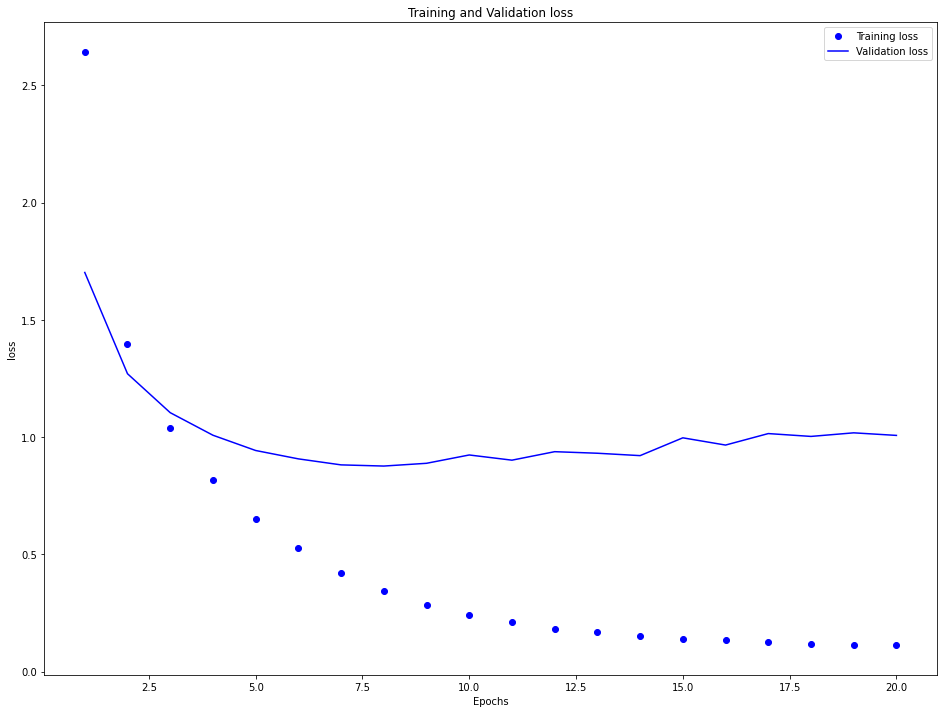

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

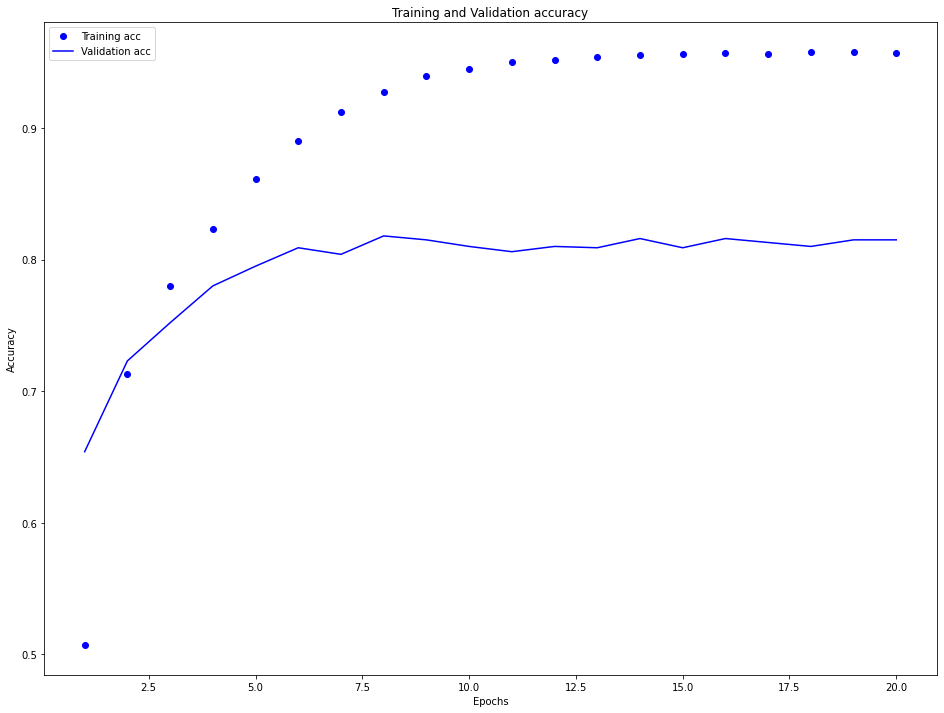

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 2s 47ms/step - loss: 2.6247 - accuracy: 0.5467
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.4024 - accuracy: 0.7036
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0480 - accuracy: 0.7660
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8348 - accuracy: 0.8163
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6658 - accuracy: 0.8583
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5406 - accuracy: 0.8842
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4325 - accuracy: 0.9073
Epoch 8/9
16/16 [==============================] - 1s 45ms/step - loss: 0.3570 - accuracy: 0.9236
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.0456 - accuracy: 0.7716
[1.045585036277771, 0.7715939283370972]


In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 3.3576 - accuracy: 0.0210
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 2.6841 - accuracy: 0.3410
Epoch 3/9
16/16 [==============================] - 1s 45ms/step - loss: 2.1247 - accuracy: 0.6247
Epoch 4/9
16/16 [==============================] - 1s 48ms/step - loss: 1.7181 - accuracy: 0.6595
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 1.4628 - accuracy: 0.6860
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 1.3025 - accuracy: 0.6996
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 1.1891 - accuracy: 0.7122
Epoch 8/9
16/16 [==============================] - 1s 45ms/step - loss: 1.1052 - accuracy: 0.7211
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.3831 - accuracy: 0.6790
[1.3830543756484985, 0.6789848804473877]
